In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

geo = "GSE171517"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Duan2021")

31-Mar-2022 18:00:30 DEBUG utils - Directory ../Dataset/Duan2021 already exists. Skipping.
31-Mar-2022 18:00:30 INFO GEOparse - File already exist: using local version.
31-Mar-2022 18:00:30 INFO GEOparse - Parsing ../Dataset/Duan2021\GSE171517_family.soft.gz: 
31-Mar-2022 18:00:30 DEBUG GEOparse - DATABASE: GeoMiame
31-Mar-2022 18:00:30 DEBUG GEOparse - SERIES: GSE171517
31-Mar-2022 18:00:30 DEBUG GEOparse - PLATFORM: GPL18058
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226511
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226512
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226513
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226514
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226515
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226516
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226517
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226518
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226519
31-Mar-2022 18:00:30 DEBUG GEOparse - SAMPLE: GSM5226520

In [3]:
data.gpls["GPL18058"].table.iloc[30:40]

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
30,10976,hsa-miR-182-3p,MIMAT0000260,mmu-miR-182-3p,MIMAT0016995,NaN,NaN,hsa-miR-182-3p,NaN
31,10977,hsa-miR-183-5p,MIMAT0000261,mmu-miR-183-5p,MIMAT0000212,rno-miR-183,MIMAT0000860,hsa-miR-183-5p,NaN
32,10985,hsa-miR-191-5p,MIMAT0000440,mmu-miR-191-5p,MIMAT0000221,rno-miR-191,MIMAT0000866,hsa-miR-191-5p,NaN
33,10986,hsa-miR-193a-3p,MIMAT0000459,mmu-miR-193-3p,MIMAT0000223,rno-miR-193,MIMAT0000868,hsa-miR-193a-3p,NaN
34,10987,hsa-miR-193b-3p,MIMAT0002819,NaN,NaN,NaN,NaN,hsa-miR-193b-3p,NaN
35,10988,hsa-miR-194-5p,MIMAT0000460,mmu-miR-194-5p,MIMAT0000224,rno-miR-194,MIMAT0000869,hsa-miR-194-5p,NaN
36,10990,hsa-miR-196a-5p,MIMAT0000226,mmu-miR-196a-5p,MIMAT0000518,rno-miR-196a,MIMAT0000871,hsa-miR-196a-5p,NaN
37,10991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10991
38,10995,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN,mmu-miR-199a-3p/mmu-miR-199b-3p,NaN,rno-miR-199a-3p,MIMAT0004738,hsa-miR-199a-3p/hsa-miR-199b-3p,NaN
39,10997,hsa-miR-19a-3p,MIMAT0000073,mmu-miR-19a-3p,MIMAT0000651,rno-miR-19a,MIMAT0000789,hsa-miR-19a-3p,NaN


In [4]:
[m.metadata["characteristics_ch1"][3].split(" ")[1].count("I") for m in data.gsms.values()]

[1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [5]:
table = pd.concat([val.table.iloc[:,min(1,i):] for i, val in enumerate(data.gsms.values())], axis=1).transpose()

In [6]:
table = table.replace(-1, np.nan)
table = table.fillna(table.min().min())

In [7]:
mirnas = table.iloc[0, :].transpose().astype(int)
table = table.iloc[1:, :]

In [8]:
np.mean(table)

0       31.557016
1        0.118543
2        0.380985
3        0.009009
4        0.011098
          ...    
3538     0.001607
3539     0.010122
3540     0.001245
3541     0.001245
3542     0.018817
Length: 3543, dtype: float64

In [9]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [10]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

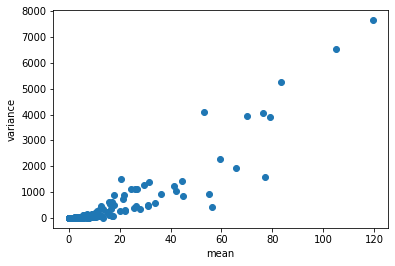

In [11]:
mean_variance_plot(table)

### Trying log-transformation

In [12]:
log_table = np.log2(table)

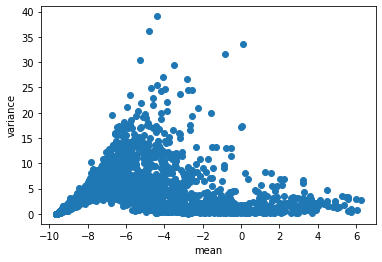

In [13]:
mean_variance_plot(log_table)

In [14]:
norm_log_table = log_table - np.mean(log_table)

In [15]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

In [16]:
norm_log_table.var().mean()

1.0000000000000002

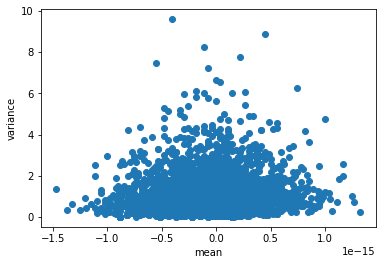

In [17]:
mean_variance_plot(norm_log_table)

In [18]:
pca = decomposition.PCA(n_components=2)

In [19]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [20]:
components = pca.transform(norm_log_table)

In [21]:
components

array([[  9.53348935,  36.01686905],
       [-51.48488281, -10.14445326],
       [-35.78994169, -16.16173773],
       [-48.0011656 ,   8.60988258],
       [-58.88482667,   6.05807826],
       [-49.88047113,  -6.31142675],
       [-16.07809642,  12.51926694],
       [ 29.10956401, -24.83006104],
       [ 52.48422992, -16.11001715],
       [ 48.17819103, -10.9125264 ],
       [ 62.17358073,  16.81440738],
       [ 58.64032929,   4.4517181 ]])

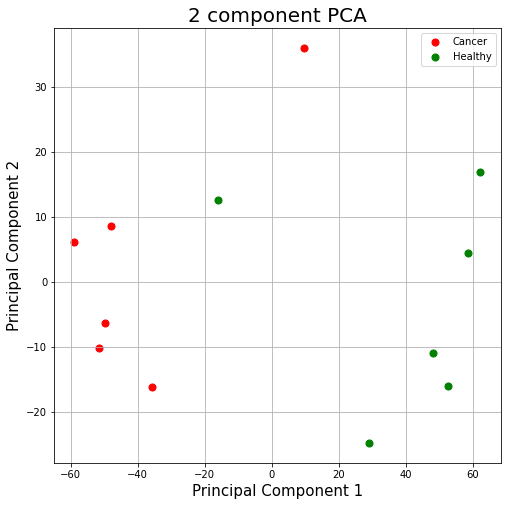

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[:6, 0], components[:6, 1], c = 'r', s = 50)
ax.scatter(components[6:, 0], components[6:, 1], c = 'g', s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("../Figures/PCA/Duan2021.pgf")

In [23]:
labels = np.array(["Control" if i > 6 else "Cancer" for i in range(12)])
pca_data = pd.DataFrame(components)
pca_data["Type"] = labels
pca_data.columns = ["PCA1", "PCA2", "Type"]
pca_data.to_csv("../Outdata/PCA/Duan2021.csv")

### Exporting data

In [24]:
id_lookup = data.gpls["GPL18058"].table
id_lookup.head()

,ID,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
0,10138,hsa-miR-130a-3p,MIMAT0000425,mmu-miR-130a-3p,MIMAT0000141,rno-miR-130a,MIMAT0000836,hsa-miR-130a-3p,NaN
1,10306,hsa-miR-146b-5p,MIMAT0002809,mmu-miR-146b-5p,MIMAT0003475,rno-miR-146b,MIMAT0005595,hsa-miR-146b-5p,NaN
2,105441,hsa-miR-518c-3p,MIMAT0002848,NaN,NaN,NaN,NaN,hsa-miR-518c-3p,NaN
3,10899,spike_control_v1_j,NaN,spike_control_v1_j,NaN,spike_control_v1_j,NaN,NaN,spike_control_v1_j
4,10901,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,hsa_negative_control_6,NaN,NaN,hsa_negative_control_6


In [25]:
id_lookup = id_lookup.set_index("ID")

In [26]:
id_lookup.loc[mirnas[:10]]

,Human_miRNA,Human_miRBase,Mouse_miRNA,Mouse_miRBase,Rat_miRNA,Rat_miRBase,miRNA_ID,SPOT_ID
ID,,,,,,,,
13138,Hy3,NaN,Hy3,NaN,Hy3,NaN,NaN,Hy3
42638,hsa-miR-23a-5p,MIMAT0004496,mmu-miR-23a-5p,MIMAT0017019,rno-miR-23a*,MIMAT0004712,hsa-miR-23a-5p,NaN
42888,NaN,NaN,mmu-miR-875-3p,MIMAT0004938,NaN,NaN,NaN,42888
17519,ebv-miR-BART1-3p,MIMAT0003390,NaN,NaN,NaN,NaN,NaN,ebv-miR-BART1-3p
17278,NaN,NaN,mmu-miR-719,MIMAT0003465,NaN,NaN,NaN,17278
46507,hsa-miR-921,MIMAT0004971,NaN,NaN,NaN,NaN,hsa-miR-921,NaN
17928,hsa-miR-181a-2-3p,MIMAT0004558,NaN,NaN,NaN,NaN,hsa-miR-181a-2-3p,NaN
42826,NaN,NaN,mmu-miR-300-5p,MIMAT0004578,rno-miR-300-5p,MIMAT0004743,NaN,42826
17537,NaN,NaN,mghv-miR-M1-3,MIMAT0001566,NaN,NaN,NaN,17537


In [27]:
mirbase_ids = id_lookup.loc[mirnas]["Human_miRBase"]

In [28]:
mask = np.logical_not(mirbase_ids.isna()).to_numpy()

In [29]:
mask[:10]

array([False,  True, False,  True, False,  True,  True, False, False,
       False])

In [30]:
mirbase_ids = mirbase_ids[mask]

In [31]:
norm_log_table = norm_log_table.loc[:, mask]

In [32]:
from Scripts import converters

In [33]:
sequences = converters.mirbase_to_seq(mirbase_ids, ignore_not_found=True)

In [34]:
sequences.count(None)

3

In [35]:
sequences = np.array(sequences)

In [36]:
mask = sequences != None

In [37]:
sequences = sequences[mask]
norm_log_table = norm_log_table.loc[:, mask]

In [38]:
norm_log_table /= norm_log_table.var().mean()**0.5

In [39]:
norm_log_table.columns = sequences
norm_log_table["cancer"] = np.array(6*[True] + 6*[False])
norm_log_table["stage"] = [m.metadata["characteristics_ch1"][3].split(" ")[1].count("I") for m in data.gsms.values()]

In [40]:
norm_log_table.to_csv("../TransformedData/Duan2021_staged.csv", index=False)